## Aula 18 - Detecção de Faces usando Classificadores Haar **(parte 2)**

### Classificadores cascata LBP

Começamos importando as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

Vamos estudar os básicos da detecção de faces usando os classificadores baseados em LBP. Esse notebook vai ser muito parecido com o da outra parte pra que a comparação seja mais fácil.

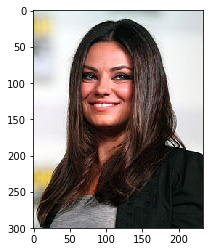

In [2]:
img = plt.imread('mila.jpg')
plt.imshow(img)

Os classificadores são salvos em um formato XML. No caso dos classificadores LBP, não há um classificador pré-treinado para olhos no repositório do OpenCV.

In [3]:
face_cascade = cv2.CascadeClassifier('lbp_class/lbpcascade_frontalface.xml')

Precisamos converter a imagem para tons de cinza:

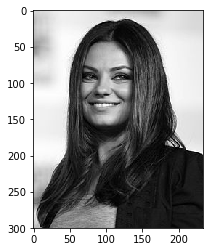

In [4]:
cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(cinza, cmap="gray")

Usamos o mesmo pipeline do último notebook para detectar e contar as faces:

In [5]:
faces = face_cascade.detectMultiScale(cinza, scaleFactor=1.3, minNeighbors=5)

In [6]:
len(faces)

1

*Faces* é um vetor **(n, 4)**, onde **n** é o número de faces com 4 informações necessárias para desenhar o *bounding-box*:
1. x;
2. y;
3. w;
4. h;

Podemos usar isso para desenhar um quadrado ao redor do rosto na imagem:

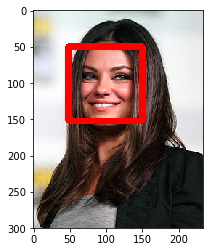

In [7]:
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    plt.imshow(img_c)

Vamos tentar com uma outra imagem:

In [8]:
img = plt.imread('stark.jpg')
cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(cinza, scaleFactor=1.3, minNeighbors=5)

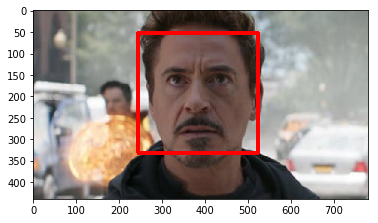

In [9]:
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
   
plt.imshow(img_c)

Os resultados são bem similares com os do Haar. Vamos compará-los:

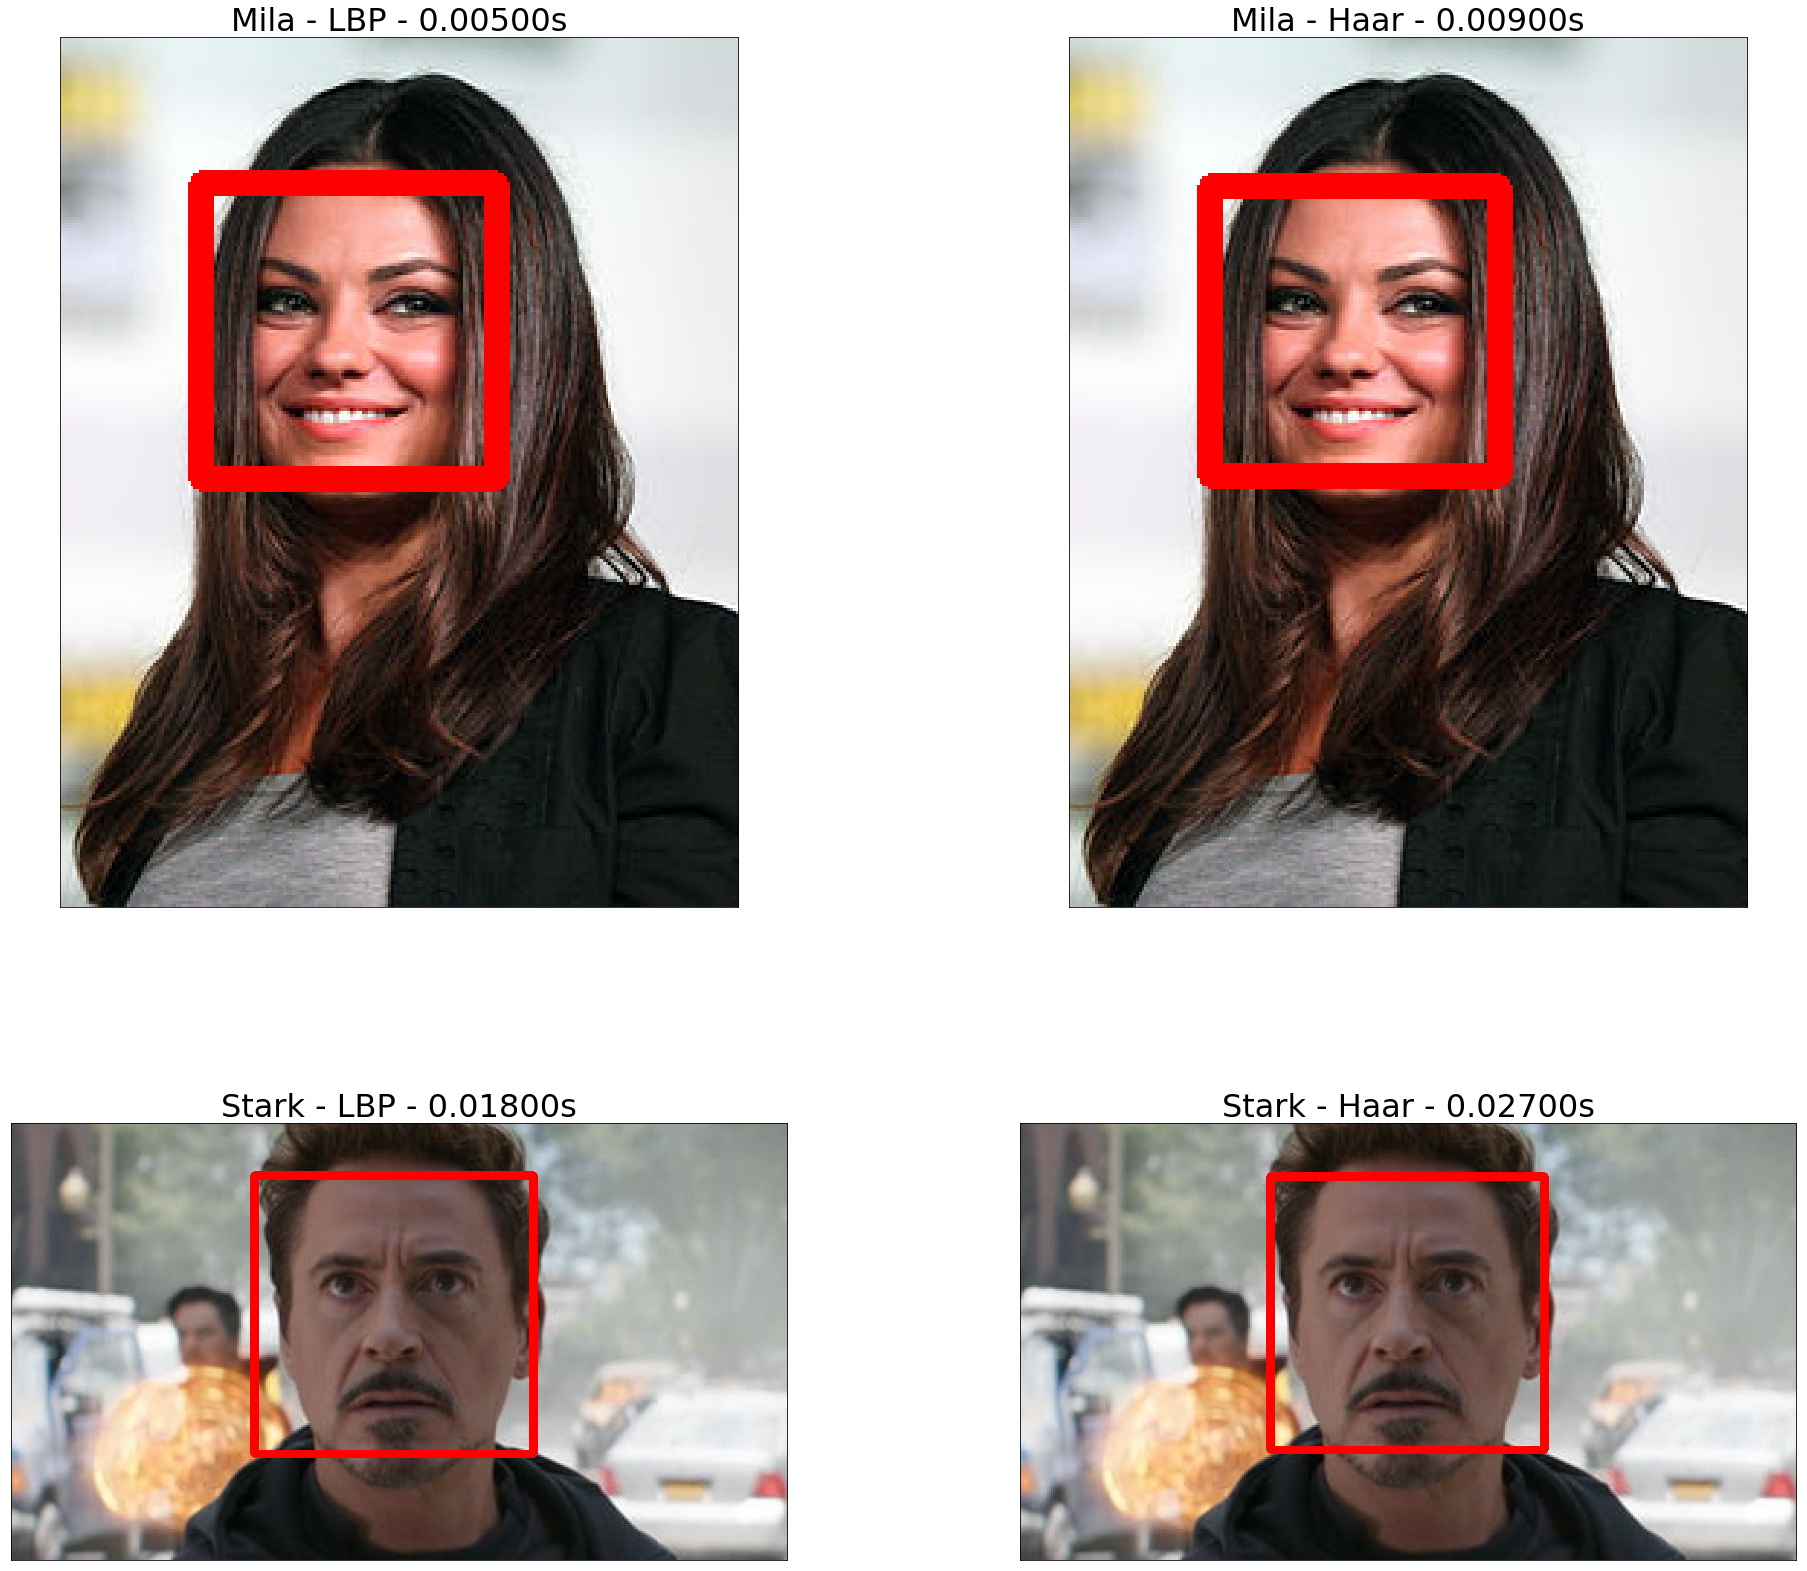

In [10]:
import time

fig, ax = plt.subplots(2, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0.3)

face_cascade_lbp = cv2.CascadeClassifier('lbp_class/lbpcascade_frontalface.xml')
face_cascade_haar = cv2.CascadeClassifier('class/haarcascade_frontalface_default.xml')

mila = plt.imread('mila.jpg')
stark = plt.imread('stark.jpg')

# Mila - LBP

inicio = time.time()
faces = face_cascade_lbp.detectMultiScale(cv2.cvtColor(mila, cv2.COLOR_RGB2GRAY), scaleFactor=1.3, minNeighbors=5)
final = time.time() - inicio
ax[0, 0].set_title("Mila - LBP - %.5fs" % (final), fontsize=32)
img_c = mila.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    ax[0, 0].imshow(img_c)
    
# Mila - Haar

inicio = time.time()
faces = face_cascade_haar.detectMultiScale(cv2.cvtColor(mila, cv2.COLOR_RGB2GRAY), scaleFactor=1.3, minNeighbors=5)
final = time.time() - inicio
ax[0, 1].set_title("Mila - Haar - %.5fs" % (final), fontsize=32)
img_c = mila.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    ax[0, 1].imshow(img_c)
    
# Stark - LBP

inicio = time.time()
faces = face_cascade_lbp.detectMultiScale(cv2.cvtColor(stark, cv2.COLOR_RGB2GRAY), scaleFactor=1.3, minNeighbors=5)
final = time.time() - inicio
ax[1, 0].set_title("Stark - LBP - %.5fs" % (final), fontsize=32)
img_c = stark.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    ax[1, 0].imshow(img_c)
    
# Stark - Haar

inicio = time.time()
faces = face_cascade_haar.detectMultiScale(cv2.cvtColor(stark, cv2.COLOR_RGB2GRAY), scaleFactor=1.3, minNeighbors=5)
final = time.time() - inicio
ax[1, 1].set_title("Stark - Haar - %.5fs" % (final), fontsize=32)
img_c = stark.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    ax[1, 1].imshow(img_c)



# Apenas pra formatação. Ignore essas linhas
ax[0, 0].xaxis.set_major_locator(plt.NullLocator())
ax[0, 0].yaxis.set_major_locator(plt.NullLocator())
ax[0, 1].xaxis.set_major_locator(plt.NullLocator())
ax[0, 1].yaxis.set_major_locator(plt.NullLocator())
ax[1, 0].xaxis.set_major_locator(plt.NullLocator())
ax[1, 0].yaxis.set_major_locator(plt.NullLocator())
ax[1, 1].xaxis.set_major_locator(plt.NullLocator())
ax[1, 1].yaxis.set_major_locator(plt.NullLocator())

O LBP é muito mais rápido. Os resultados estão similares, mas isso não é regra: o LBP tende a ser pior que o Haar.
O trade-off entre velocidade e precisão é claro.

### Visualizando o LBP

Vamos visualizar um vetor LBP. Para isso, vamos trabalhar com o scikit-imagem, mais especificamente com o método [local_binary_pattern()](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern).

Os argumentos que iremos usar são:
1. Imagem em grayscale;
2. pint=10: Número de vizinhos circularmente simétricos;
3. Rfloat=5: Raio dos círculos;
4. method="default": invariante à rotação.

Outros métodos possuem outras invariâncias. Consultar a documentação par mais detalhes.

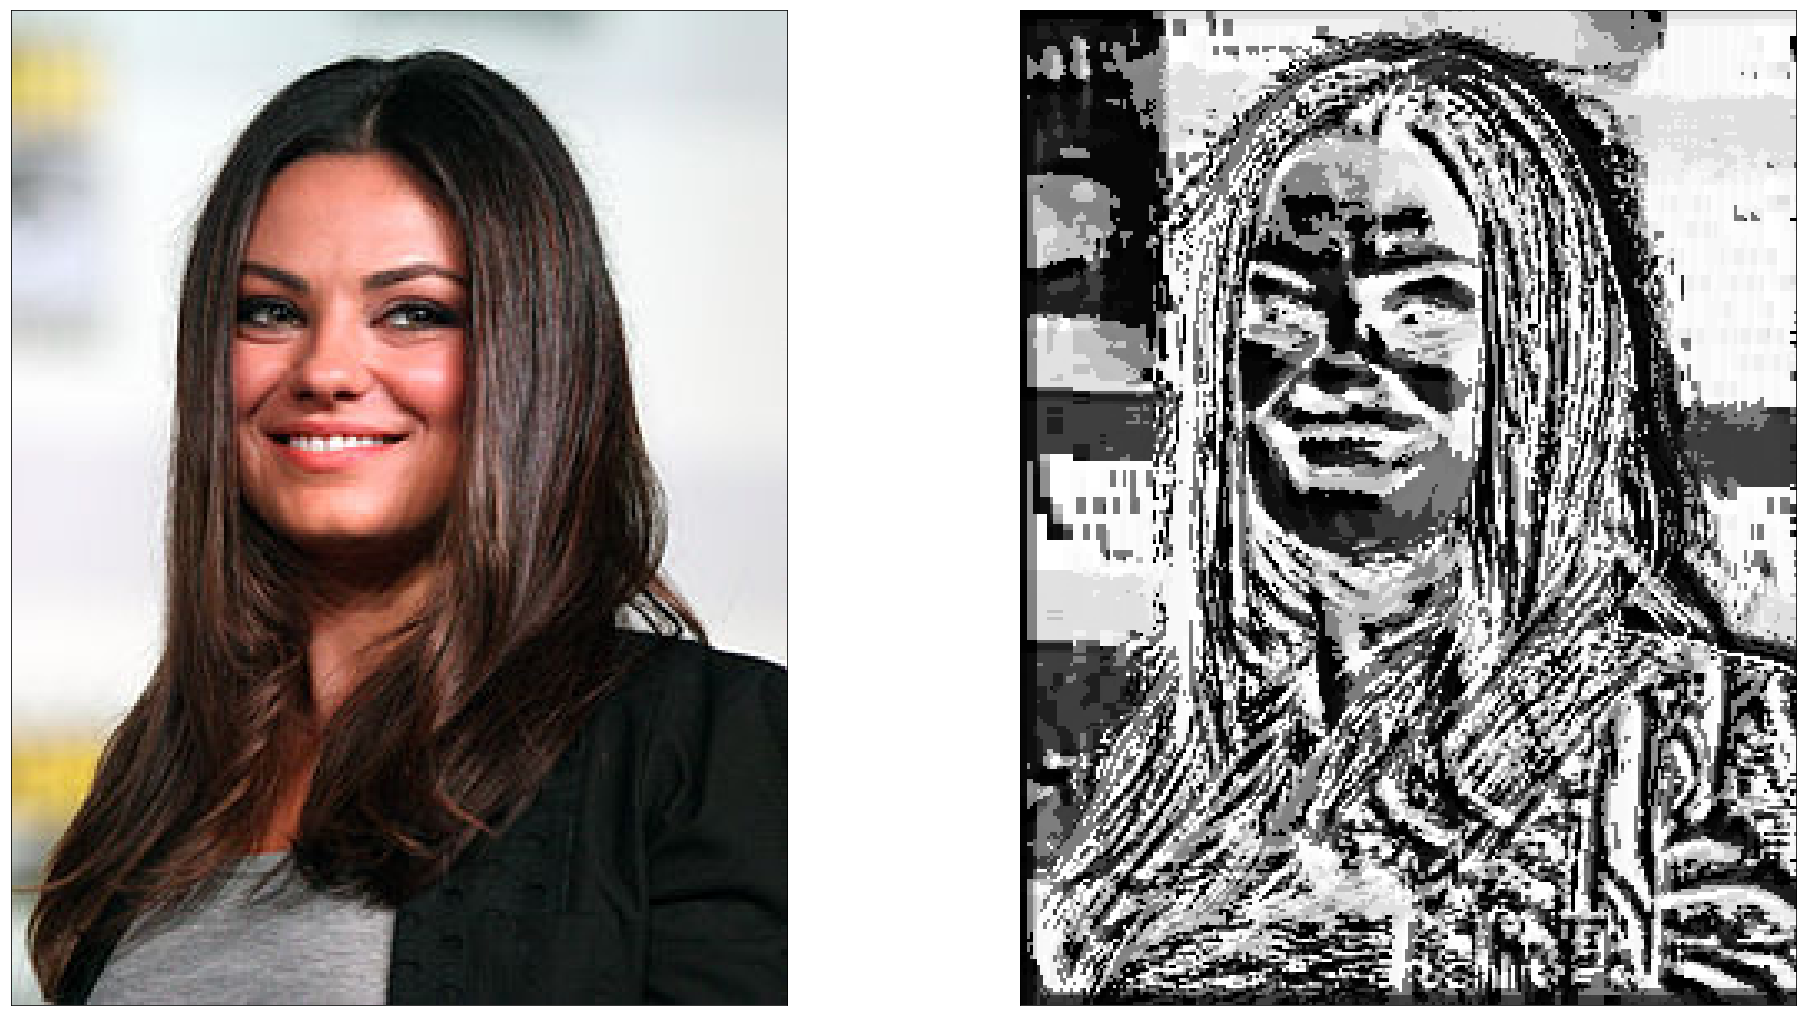

In [25]:
from skimage import feature

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax[0].imshow(mila)

lbp = feature.local_binary_pattern(cv2.cvtColor(mila, cv2.COLOR_RGB2GRAY), 10, 5, method="default")
ax[1].imshow(lbp.astype("uint8"), cmap="gray")

# Apenas pra formatação. Ignore essas linhas
ax[0].xaxis.set_major_locator(plt.NullLocator())
ax[0].yaxis.set_major_locator(plt.NullLocator())
ax[1].xaxis.set_major_locator(plt.NullLocator())
ax[1].yaxis.set_major_locator(plt.NullLocator())

Vamos ainda plotar o histograma desse vetor. Seguimos os mesmos passos do notebook de histogramas:

(0, 0.03)

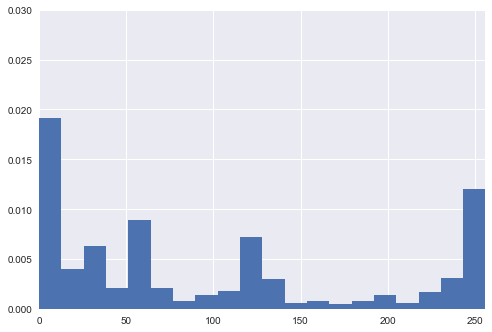

In [33]:
plt.style.use("seaborn")
(fig, ax) = plt.subplots()
ax.hist(lbp.ravel(), normed=True, bins=20, range=(0, 256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.030])

### Criando o seu classificador

Criar o classificador baseado em LBP é muito mais rápido do que baseado em Haar. O pipeline é o mesmo, então podemos executar as mesmas células que no exemplo anterior:

Para agilizar, as imagens negativas e as anotações estão disponibilizadas junto com o repositório. 
Essas imagens já são tratadas e não possuem nenhuma imagem fora da categoria correta. Essas são as **imagens negativas**.

Vamos extraí-las:

In [11]:
import zipfile

zipfilePath = ("./neg.zip")
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

Iremos gerar nossas imagens positivas a partir das imagens negativas. Por não termos um conjunto de imagens positivas anotadas, esse caminho é o caminho mais simples.

Isso é muito comum para detectar e rastrear marcas em uma cena, por exemplo.

A imagem que iremos localizar na cena é a abaixo:

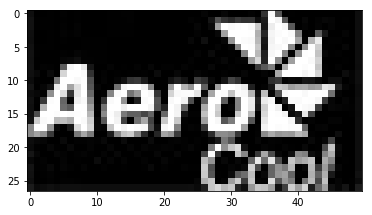

In [12]:
aero = plt.imread('aerocool.jpg')
plt.imshow(aero)

Vamos criar um diretório para armazenar as imagens positivas:

In [13]:
import os
if not os.path.exists('info'):
    os.mkdir('info')

Iremos executar o binário **opencv_createsamples.exe**. Este binário recebe uma imagem positiva (aerocool.jpg) e aplica essa imagem nas imagens negativas, gerando assim, imagens positivas.

In [14]:
zipfilePath = ("./opencv_bin_pack.zip")
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

In [15]:
from subprocess import check_output
check_output("opencv_createsamples.exe -img aerocool.jpg -bg bg.txt -info info/info.lst -pngoutput info -maxxangle 0.5 -maxyangle 0.5 -maxzangle 0.5 -num 1950", shell=True)

b'Info file name: info/info.lst\r\nImg file name: aerocool.jpg\r\nVec file name: (NULL)\r\nBG  file name: bg.txt\r\nNum: 1950\r\nBG color: 0\r\nBG threshold: 80\r\nInvert: FALSE\r\nMax intensity deviation: 40\r\nMax x angle: 0.5\r\nMax y angle: 0.5\r\nMax z angle: 0.5\r\nShow samples: FALSE\r\nWidth: 24\r\nHeight: 24\r\nMax Scale: -1\r\nRNG Seed: 12345\r\nCreate test samples from single image applying distortions...\r\nOpen background image: neg/1343.jpg\r\nOpen background image: neg/1106.jpg\r\nOpen background image: neg/812.jpg\r\nOpen background image: neg/325.jpg\r\nOpen background image: neg/770.jpg\r\nOpen background image: neg/204.jpg\r\nOpen background image: neg/1709.jpg\r\nOpen background image: neg/556.jpg\r\nOpen background image: neg/2067.jpg\r\nOpen background image: neg/1750.jpg\r\nOpen background image: neg/21.jpg\r\nOpen background image: neg/1480.jpg\r\nOpen background image: neg/2350.jpg\r\nOpen background image: neg/1930.jpg\r\nOpen background image: neg/1247.jpg\r\

Podemos ver abaixo como as imagens são salvas:

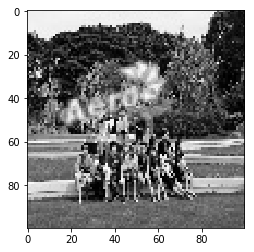

In [16]:
plt.imshow(plt.imread('info/0001_0010_0010_0060_0060.jpg'), cmap="gray")

Como já temos as nossas imagens positivas, vamos gerar nosso dataset. Os passos anteriores poderiam ter sido substituídos por várias imagens de uma mesma classe, como por exemplo, fotos de qualquer objeto.

Vamos executar novamente o comando anterior, agora passando o diretório das imagens positivas:

In [17]:
check_output("opencv_createsamples.exe -info info/info.lst -num 1950 -w 20 -h 20 -vec positives.vec", shell=True)

b'Info file name: info/info.lst\r\nImg file name: (NULL)\r\nVec file name: positives.vec\r\nBG  file name: (NULL)\r\nNum: 1950\r\nBG color: 0\r\nBG threshold: 80\r\nInvert: FALSE\r\nMax intensity deviation: 40\r\nMax x angle: 1.1\r\nMax y angle: 1.1\r\nMax z angle: 0.5\r\nShow samples: FALSE\r\nWidth: 20\r\nHeight: 20\r\nMax Scale: -1\r\nRNG Seed: 12345\r\nCreate training samples from images collection...\r\nDone. Created 1950 samples\r\n'

### Diferença no treinamento entre o LBP e o Haar

Os passos anteriores eram iguais ao do último notebook, a diferença está apenas no **treinamento**. Usamos o mesmo comando, mas precisamos adicionar o argumento **-featureType LBP**. Podemos ver que com LBP o treinamento é bem mais rápido:

- Core i7-4790K - **Haar**: 6 minutos;
- Core i7-4790K - **LBP**: 8 segundos.

In [18]:
if not os.path.exists('data'):
    os.mkdir('data')

check_output(".\opencv_traincascade.exe -featureType LBP -data data -vec positives.vec -bg bg.txt -numPos 1800 -numNeg 900 -numStages 10 -w 20 -h 20", shell=True)

b'PARAMETERS:\r\ncascadeDirName: data\r\nvecFileName: positives.vec\r\nbgFileName: bg.txt\r\nnumPos: 1800\r\nnumNeg: 900\r\nnumStages: 10\r\nprecalcValBufSize[Mb] : 1024\r\nprecalcIdxBufSize[Mb] : 1024\r\nacceptanceRatioBreakValue : -1\r\nstageType: BOOST\r\nfeatureType: LBP\r\nsampleWidth: 20\r\nsampleHeight: 20\r\nboostType: GAB\r\nminHitRate: 0.995\r\nmaxFalseAlarmRate: 0.5\r\nweightTrimRate: 0.95\r\nmaxDepth: 1\r\nmaxWeakCount: 100\r\nNumber of unique features given windowSize [20,20] : 3969\r\n\r\n===== TRAINING 0-stage =====\r\n<BEGIN\r\nPOS current samples: 1\rPOS current samples: 2\rPOS current samples: 3\rPOS current samples: 4\rPOS current samples: 5\rPOS current samples: 6\rPOS current samples: 7\rPOS current samples: 8\rPOS current samples: 9\rPOS current samples: 10\rPOS current samples: 11\rPOS current samples: 12\rPOS current samples: 13\rPOS current samples: 14\rPOS current samples: 15\rPOS current samples: 16\rPOS current samples: 17\rPOS current samples: 18\rPOS curre

Com o classificador treinado, podemos carregá-lo e testar na nossa imagem. Com o Haar era necessário tunar o parâmetro **minSize=(60, 60)** pra que ele detectasse corretamente. O LBP parece funcionar bem:

In [19]:
img = plt.imread('gabinete.jpeg')
cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

if not os.path.exists('data'):
    zipfilePath = ("./data.zip")
    zip = zipfile.ZipFile(zipfilePath)
    zip.extractall(".")
    zip.close()

marca = cv2.CascadeClassifier('data/cascade.xml')
marcas = marca.detectMultiScale(cinza, scaleFactor=1.3, minNeighbors=3)
print(len(marcas))

1


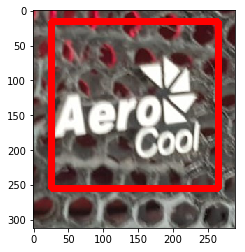

In [20]:
img_c = img.copy()
for (x,y,w,h) in marcas:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    plt.imshow(img_c)